In [170]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

df = pd.read_excel('life_expect.xlsx')
df.head()

,country,life_expect,gdp_per_cap,health,alcohol,tobacco,co2,basic,poor
0,Afghanistan,63.565000,497.741429,74.234104,0.01618,23.8,0.297564,73.784643,1
1,Algeria,76.474000,4021.983266,250.560776,0.61271,21.0,3.994402,94.239140,0
2,Armenia,75.439000,4828.504886,549.474365,4.98389,25.8,2.196552,99.928172,0
3,Australia,82.900000,55049.571920,5555.374023,10.09080,14.0,15.599045,99.969854,0
4,Austria,81.895122,50067.585727,5262.054199,11.97275,27.1,7.263331,99.999997,0


In [171]:
df.shape

(143, 9)

In [172]:
df.isna().sum()

,0
country,0
life_expect,0
gdp_per_cap,0
health,0
alcohol,0
tobacco,0
co2,0
basic,0
poor,0


In [173]:
df.dtypes

,0
country,object
life_expect,float64
gdp_per_cap,float64
health,float64
alcohol,float64
tobacco,float64
co2,float64
basic,float64
poor,int64


In [174]:
df.describe()

,life_expect,gdp_per_cap,health,alcohol,tobacco,co2,basic,poor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,72.987986,15471.696417,1272.000291,5.790280,20.528671,4.352618,89.681126,0.153846
std,7.567042,20302.730593,1986.787885,4.065011,9.992621,4.846799,14.258219,0.362069
min,52.910000,497.741429,19.350466,0.000000,3.600000,0.033715,35.678057,0.000000
25%,67.069500,2145.001918,82.665367,2.065270,11.850000,0.936189,84.910668,0.000000
50%,74.202000,6233.258167,397.409119,5.452650,20.800000,3.296801,96.194090,0.000000
75%,78.881402,19262.889082,1355.779419,9.370780,27.350000,6.110625,99.765495,0.000000
max,84.356341,112726.439673,10661.028320,16.989640,49.200000,31.877203,100.000000,1.000000


In [175]:
t = df.describe()
t.to_excel('describe.xlsx')

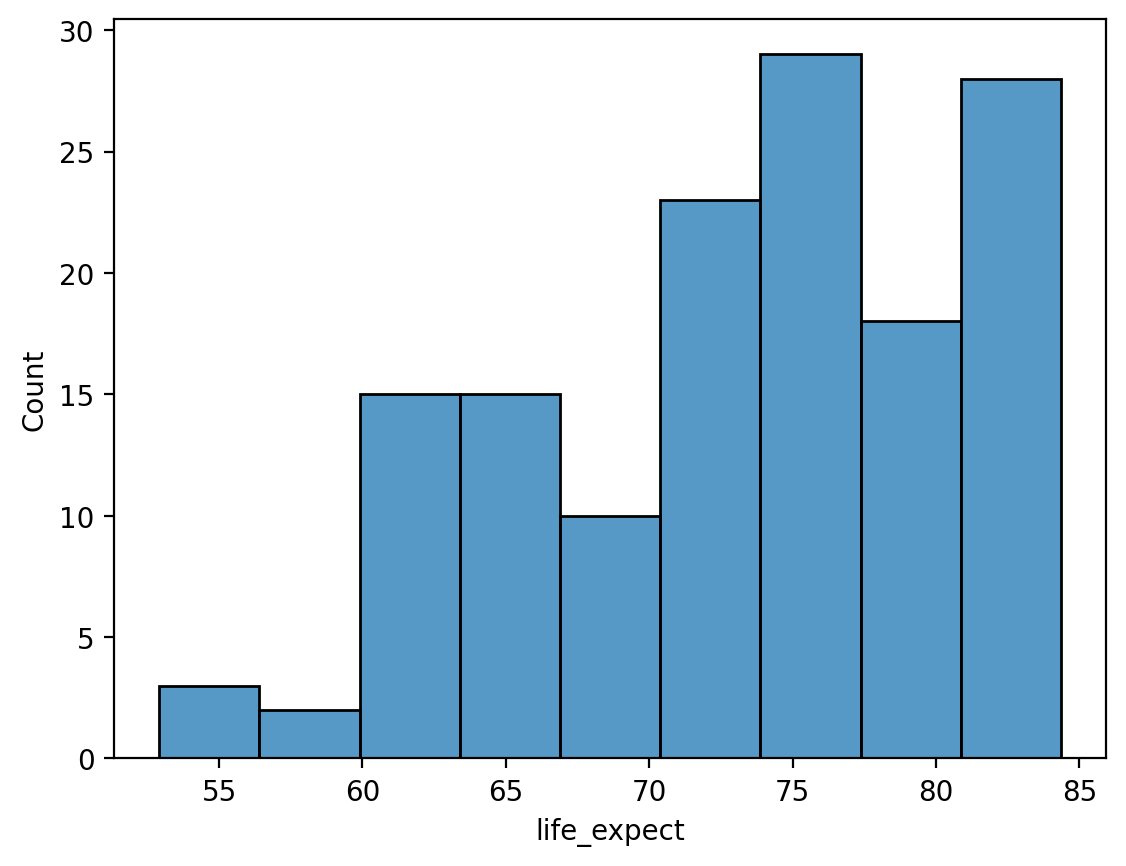

In [176]:
sns.histplot(df.life_expect);

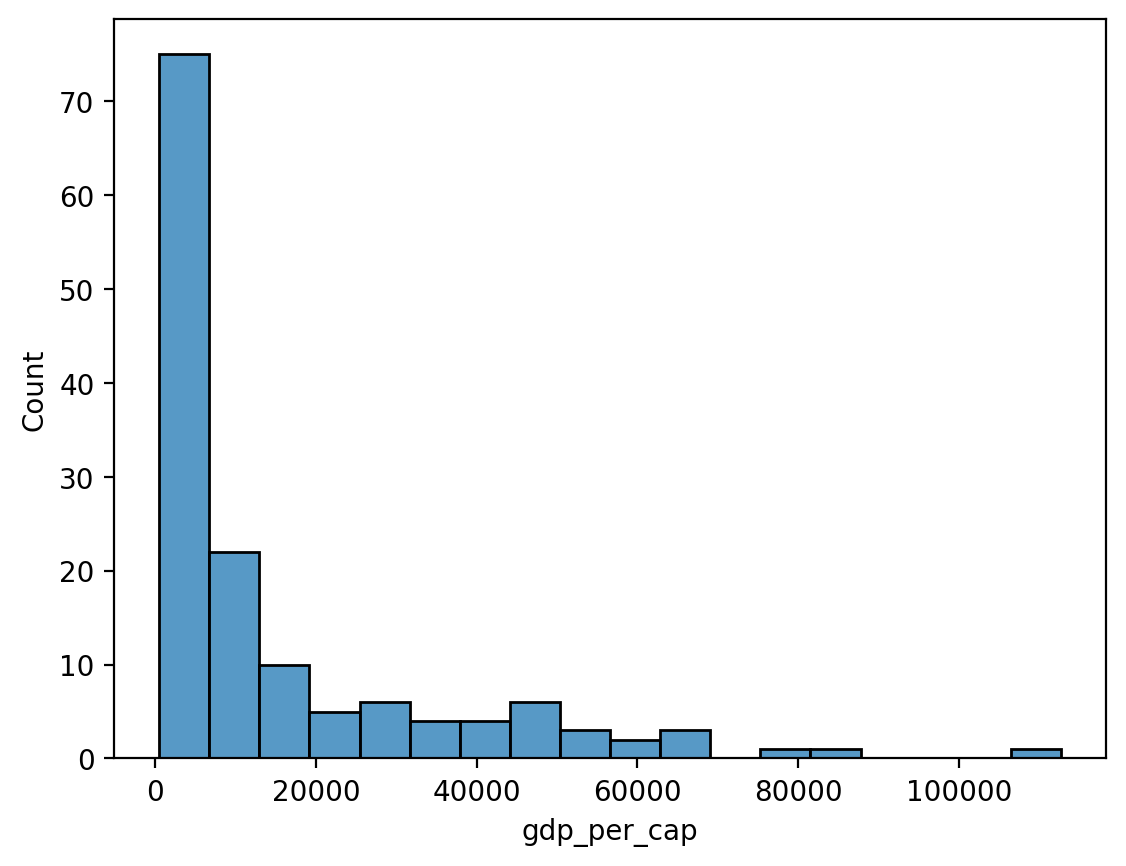

In [177]:
sns.histplot(df.gdp_per_cap);

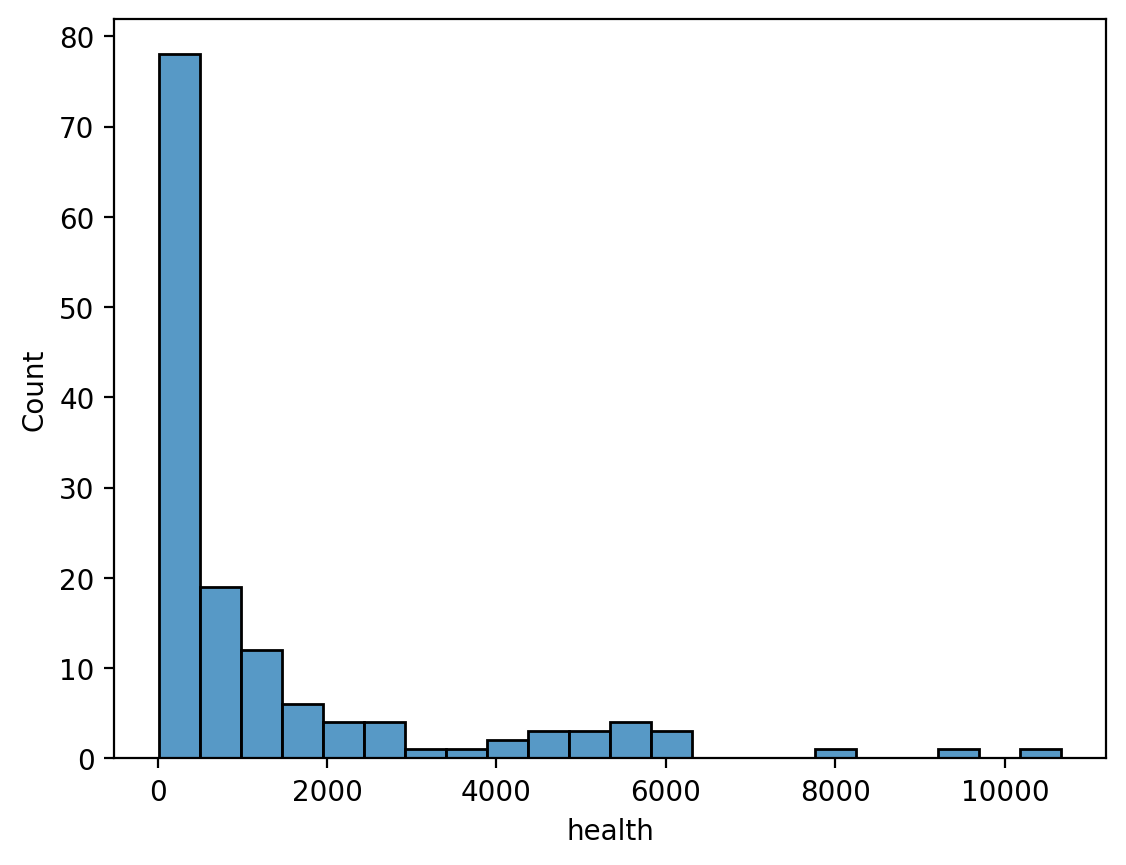

In [178]:
sns.histplot(df.health);

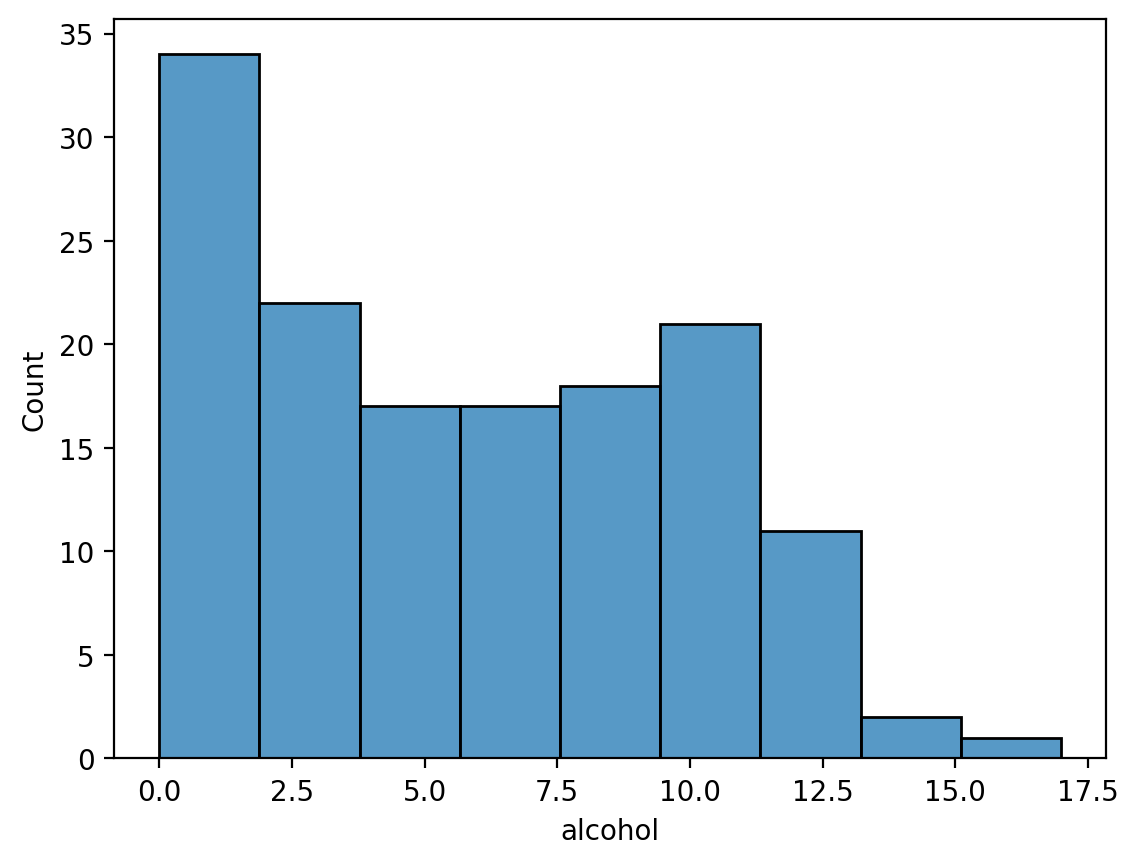

In [179]:
sns.histplot(df.alcohol);

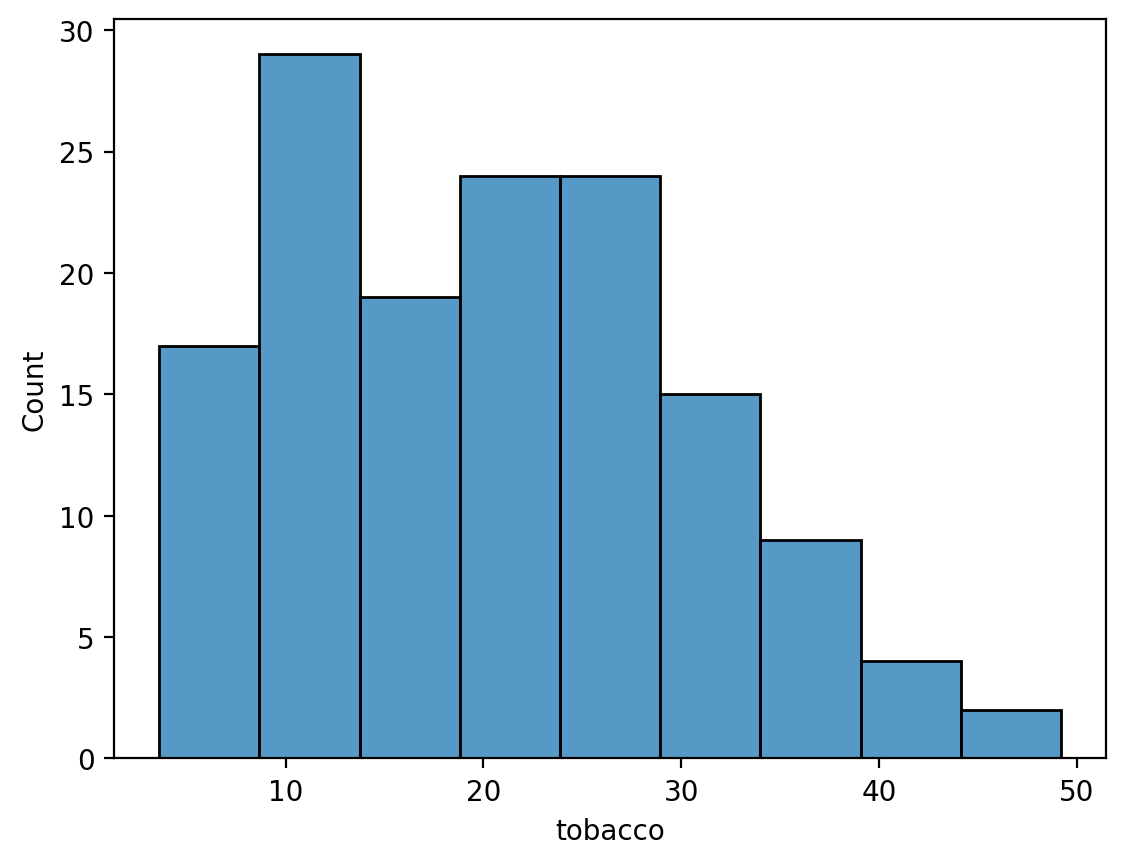

In [180]:
sns.histplot(df.tobacco);

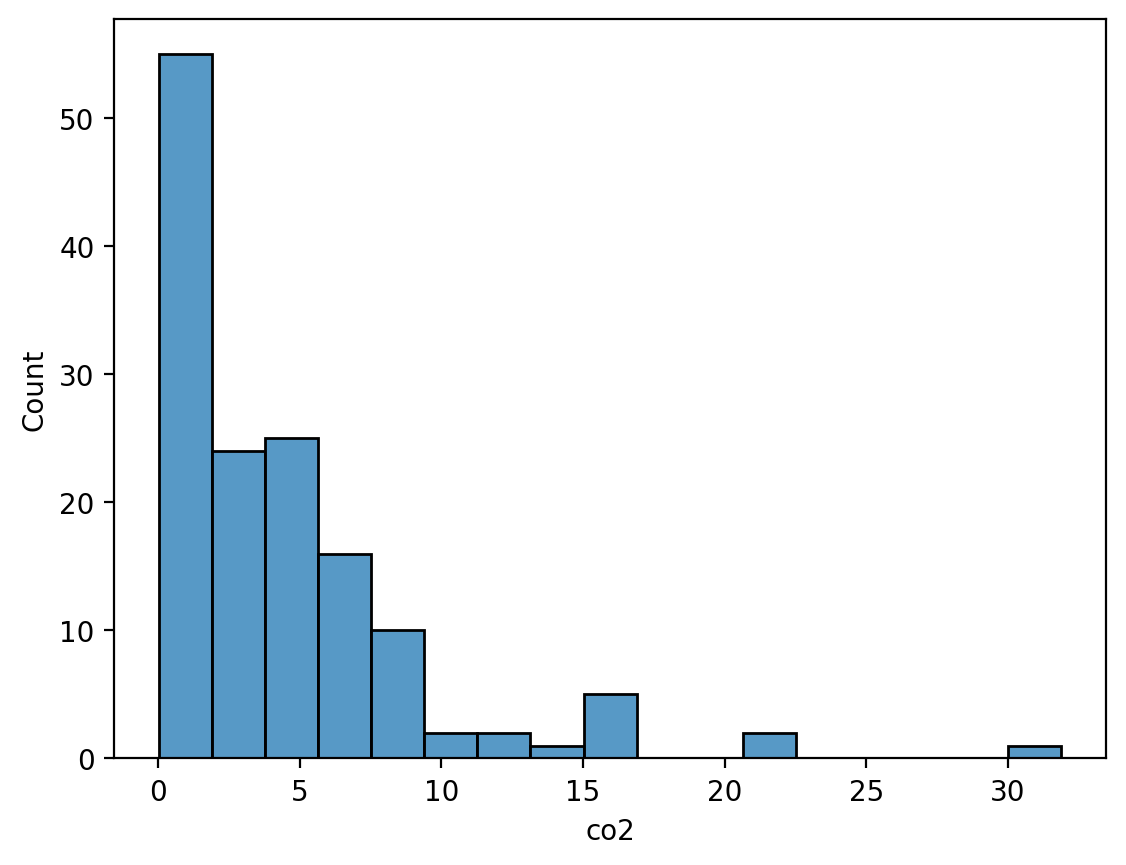

In [181]:
sns.histplot(df.co2);

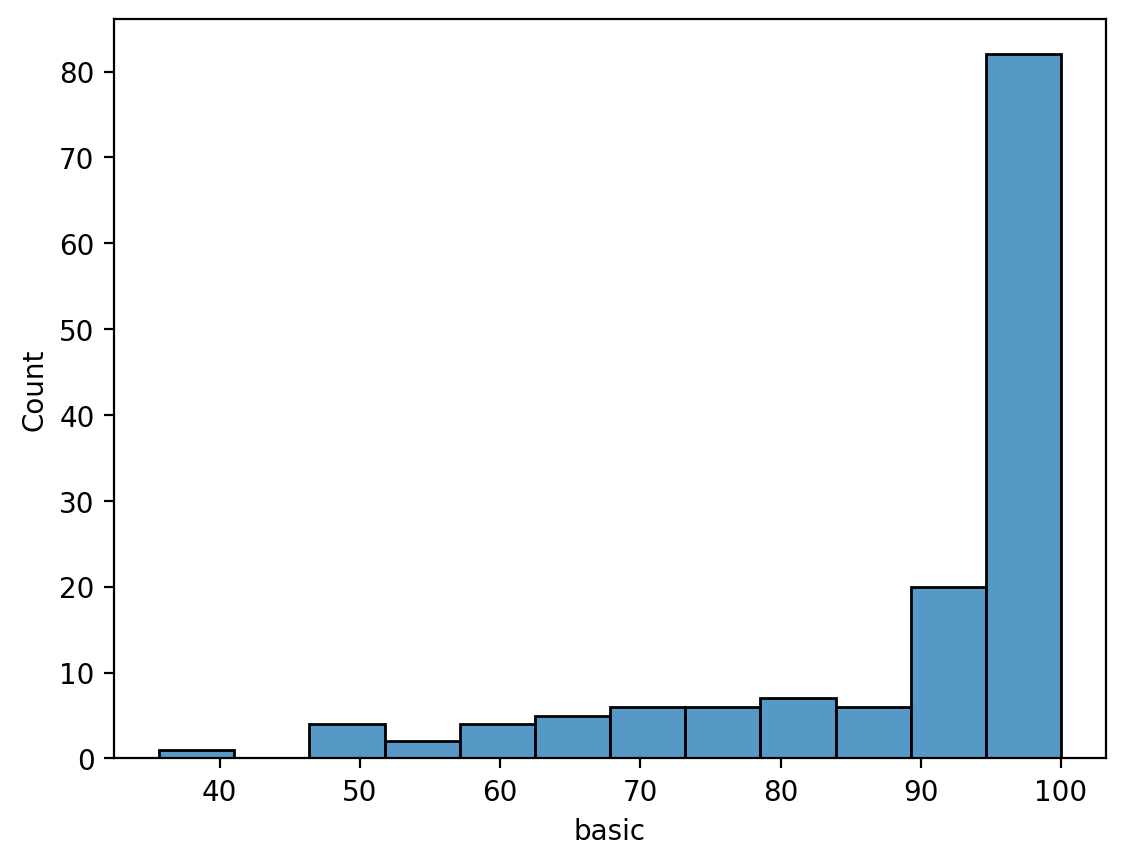

In [182]:
sns.histplot(df.basic);

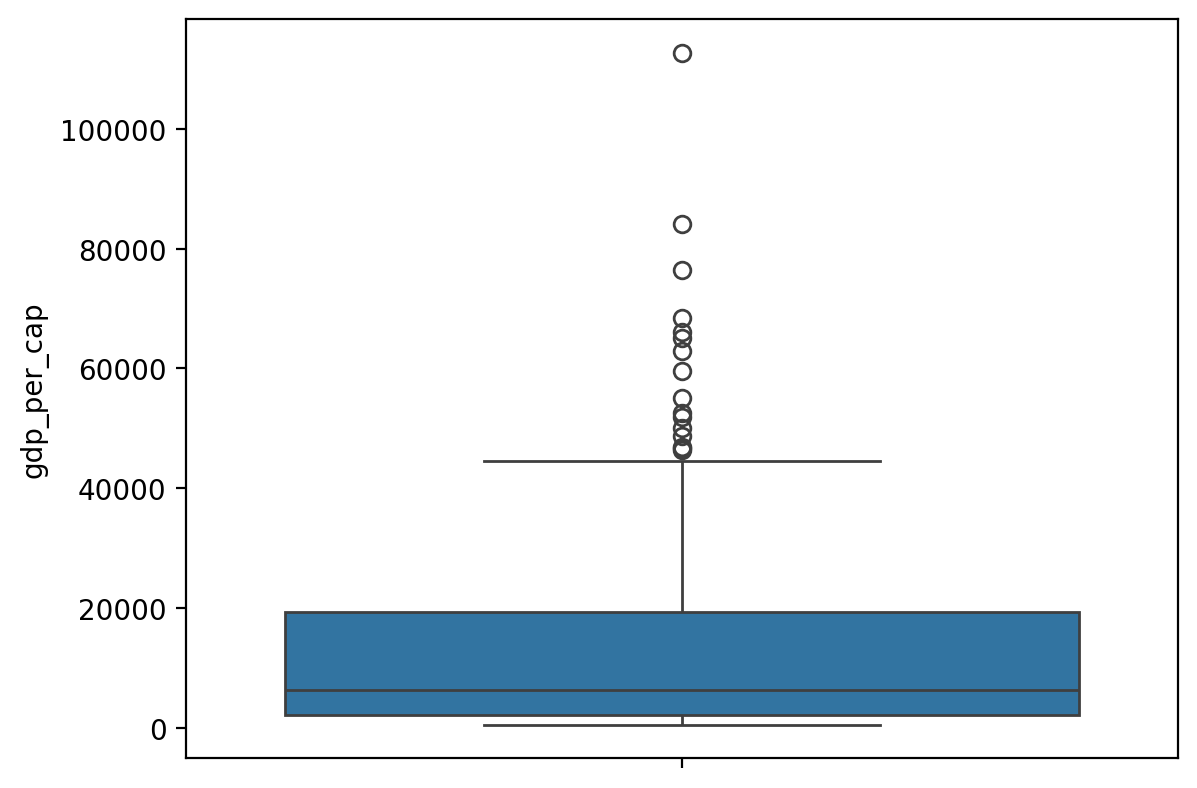

In [183]:
sns.boxplot(df.gdp_per_cap);

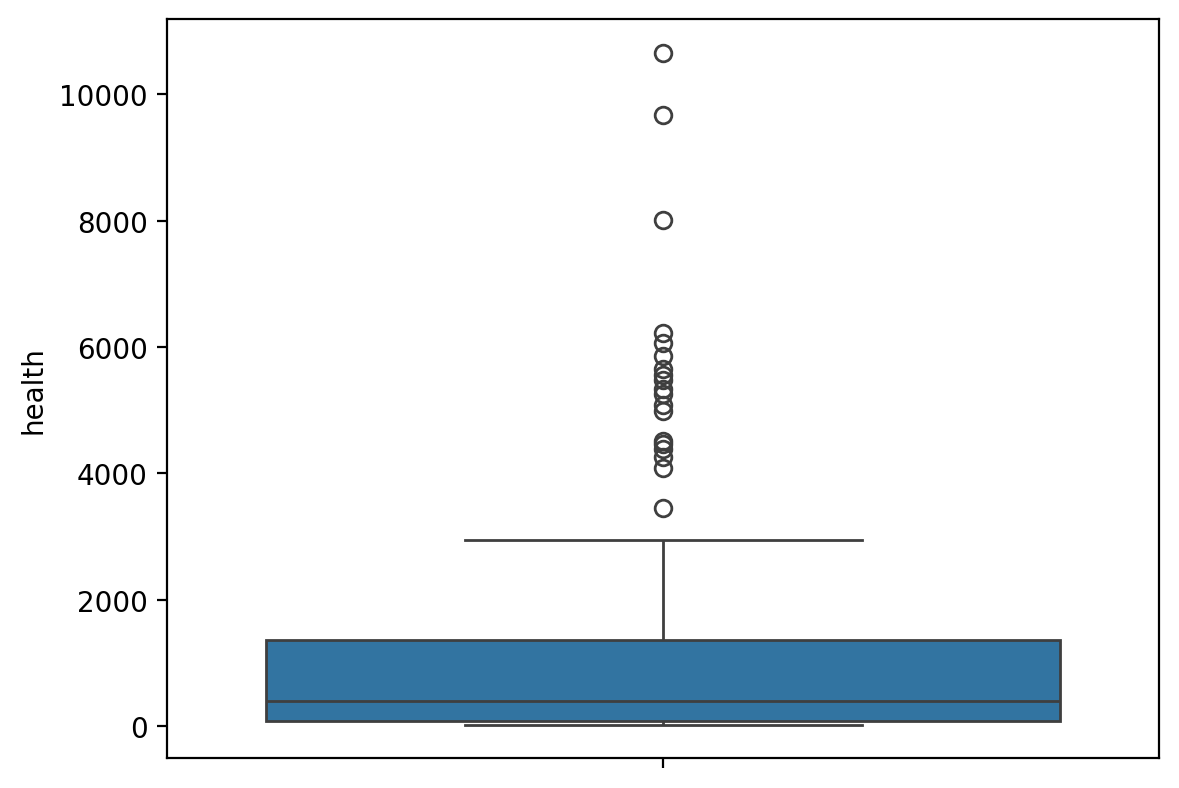

In [184]:
sns.boxplot(df.health);

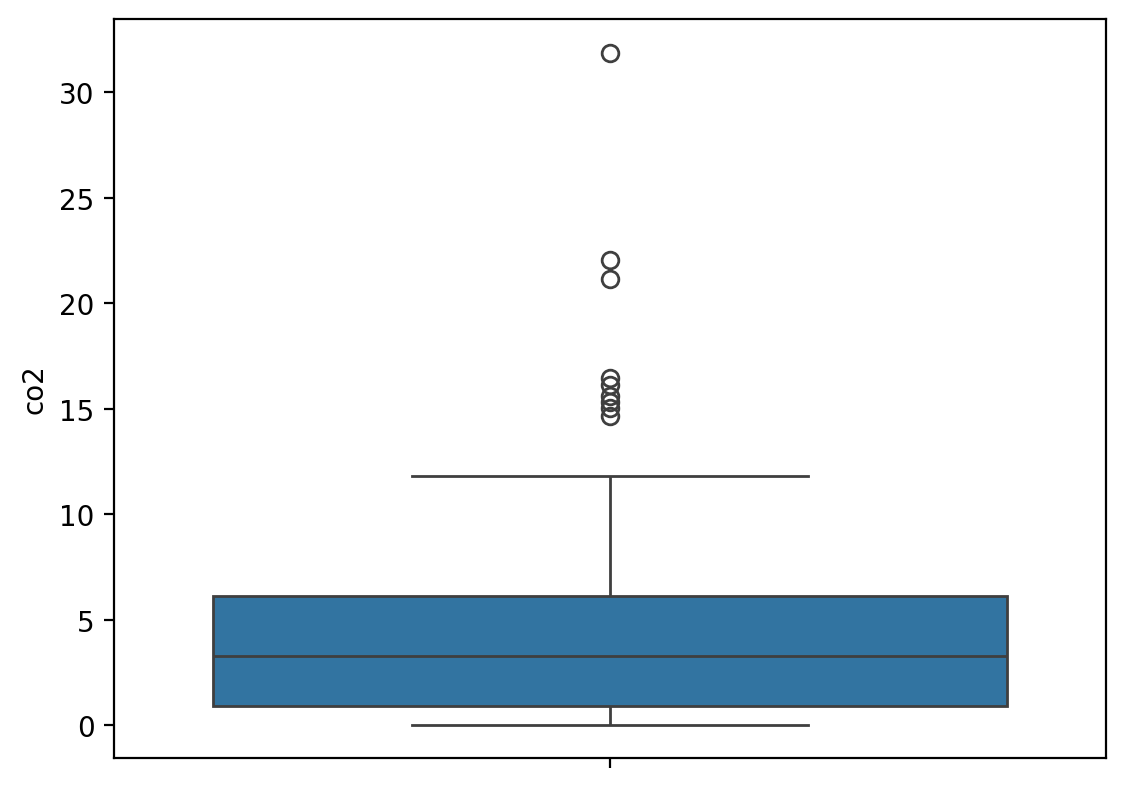

In [185]:
sns.boxplot(df.co2);

In [186]:
df = df[(df.gdp_per_cap<100000)&(df.health<7000)&(df.co2<30)]

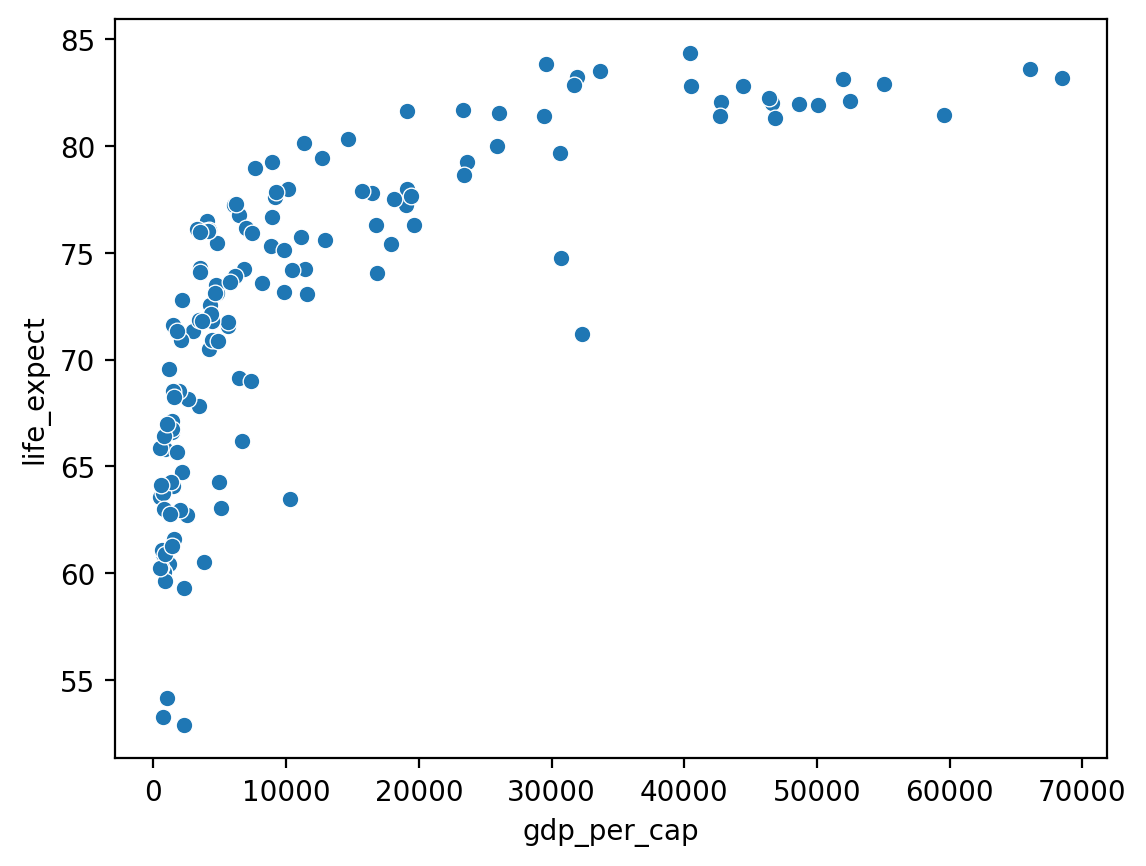

In [187]:
sns.scatterplot(data=df, x='gdp_per_cap', y='life_expect');

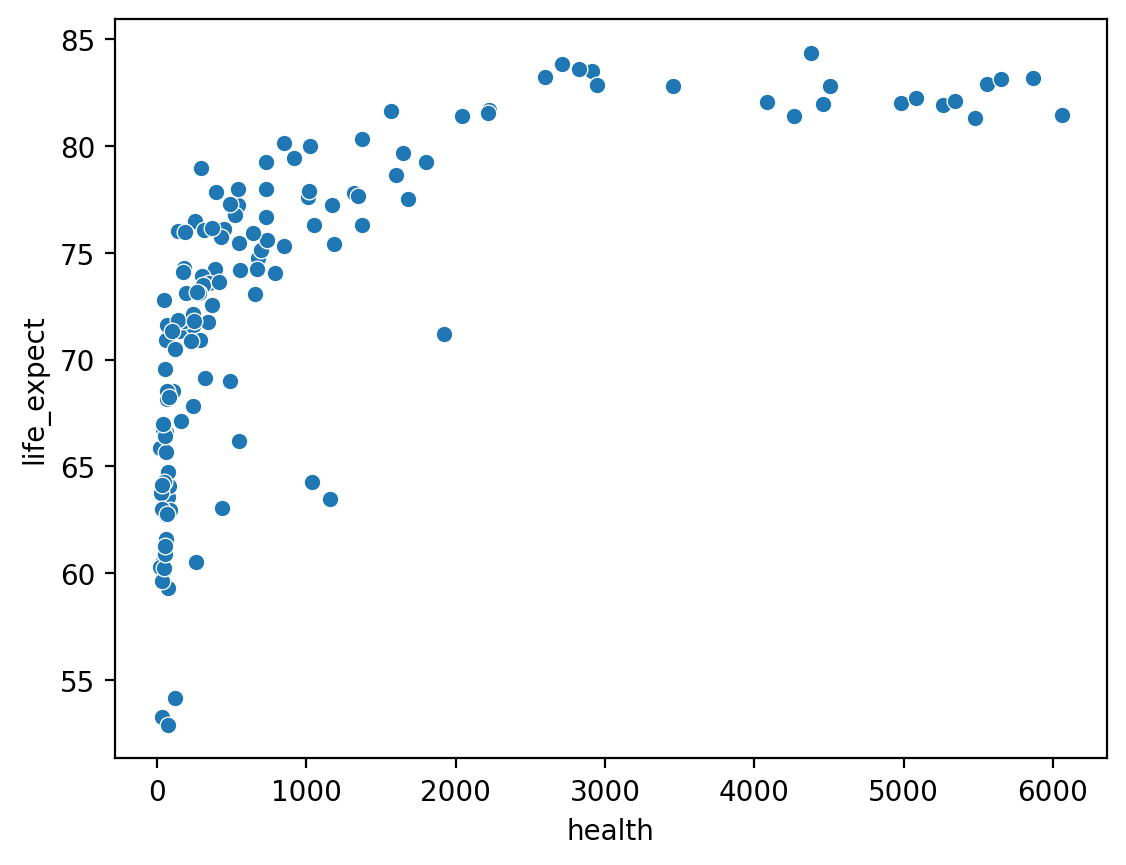

In [188]:
sns.scatterplot(data=df, x='health', y='life_expect');

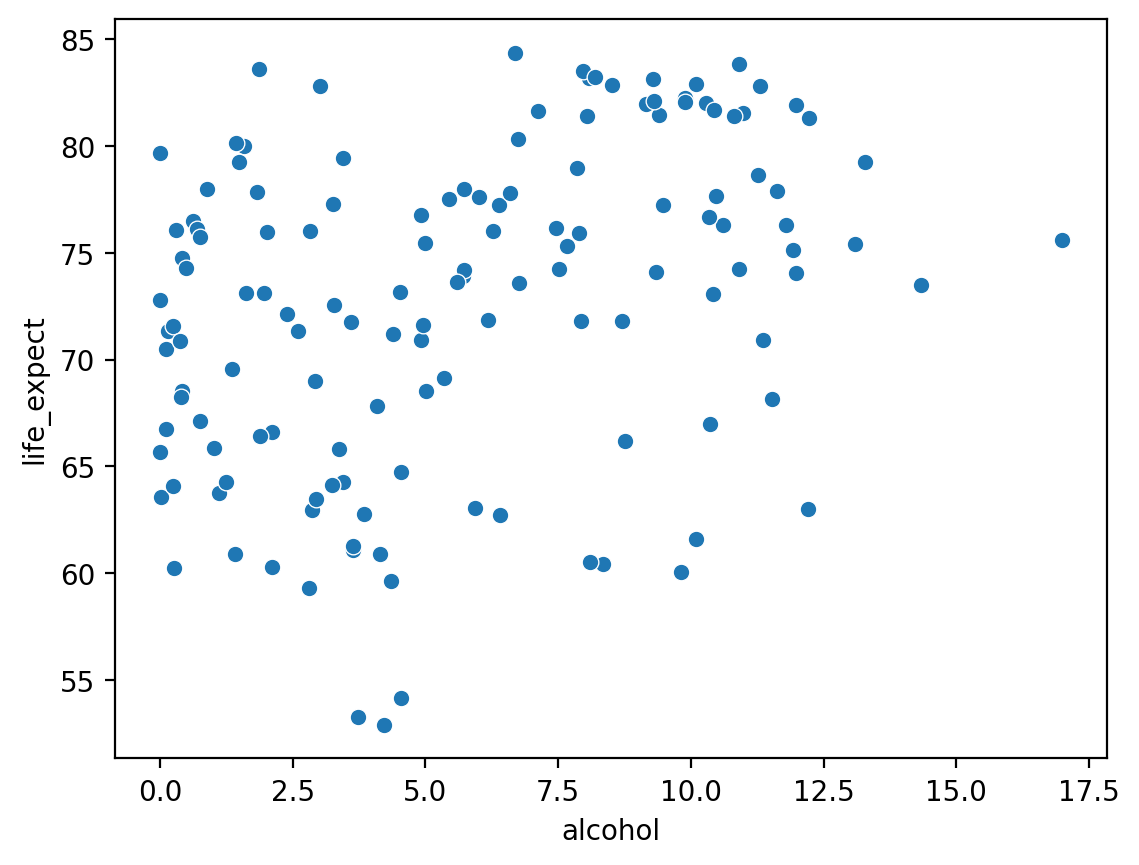

In [189]:
sns.scatterplot(data=df, x='alcohol', y='life_expect');

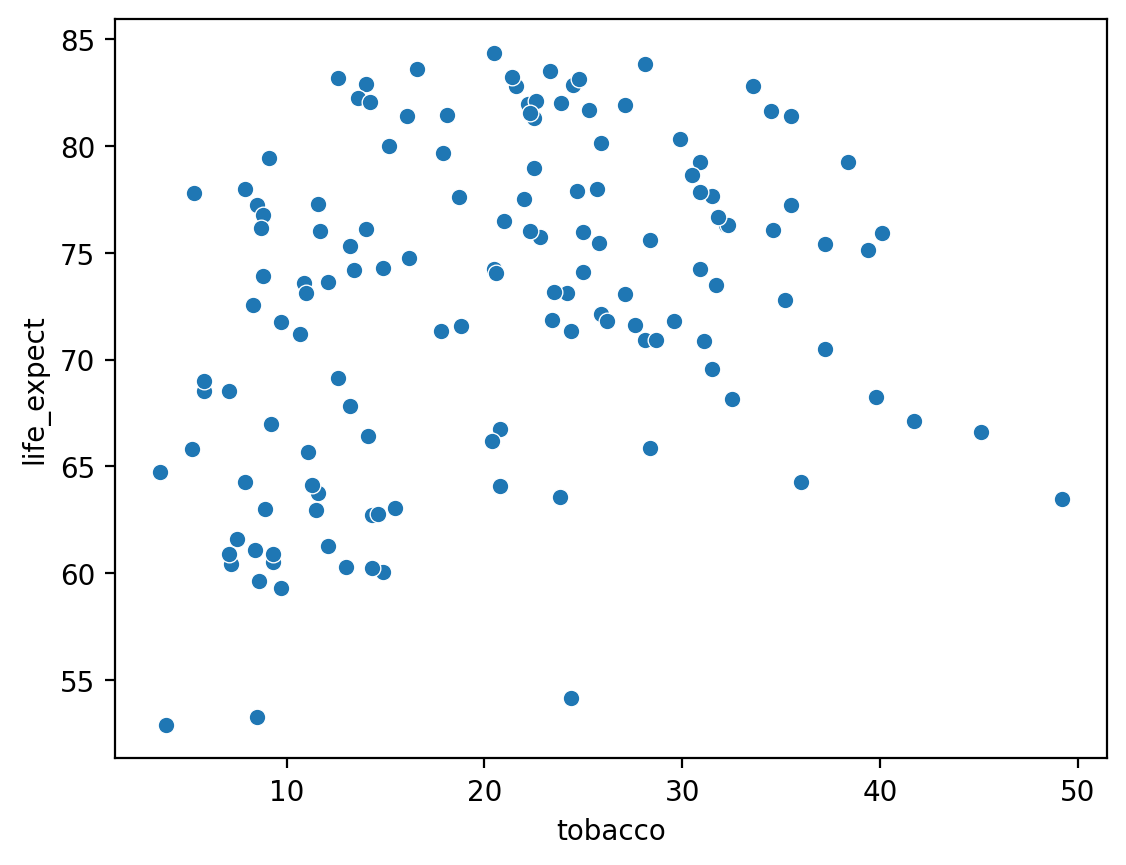

In [190]:
sns.scatterplot(data=df, x='tobacco', y='life_expect');

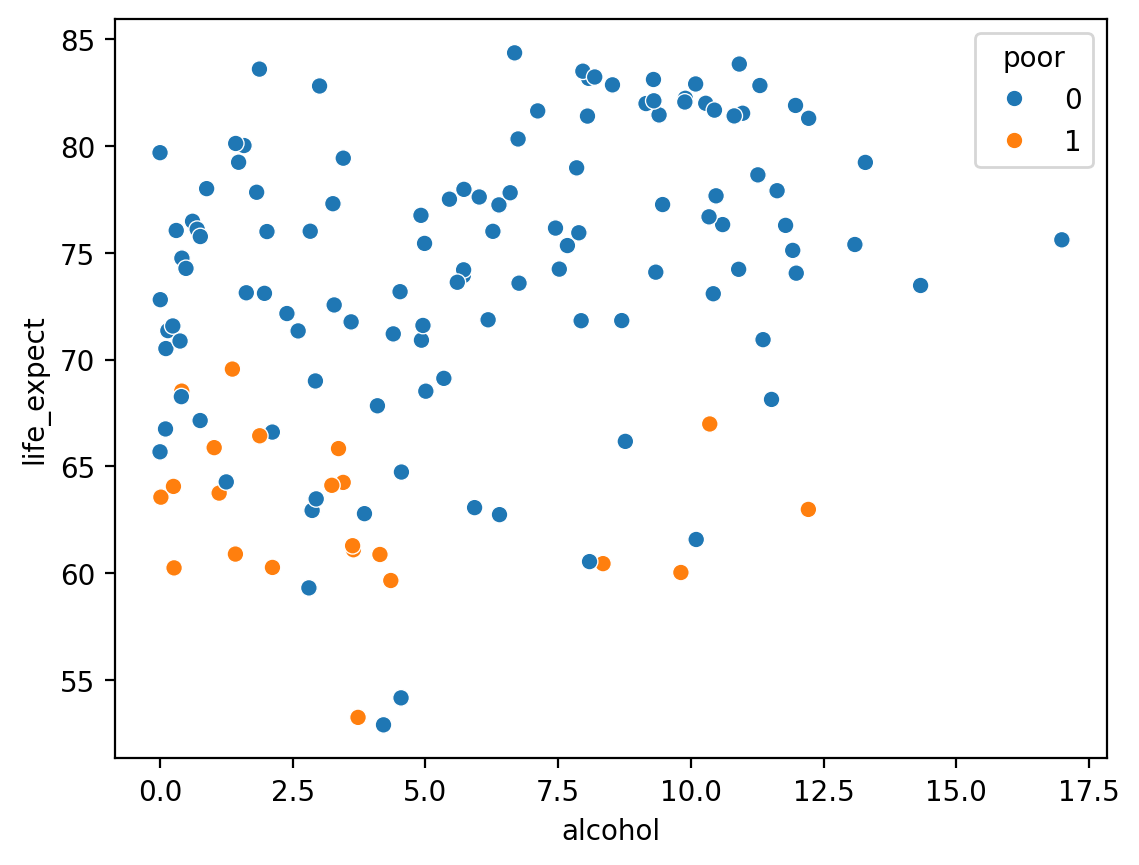

In [191]:
sns.scatterplot(data=df, x='alcohol', y='life_expect', hue='poor');

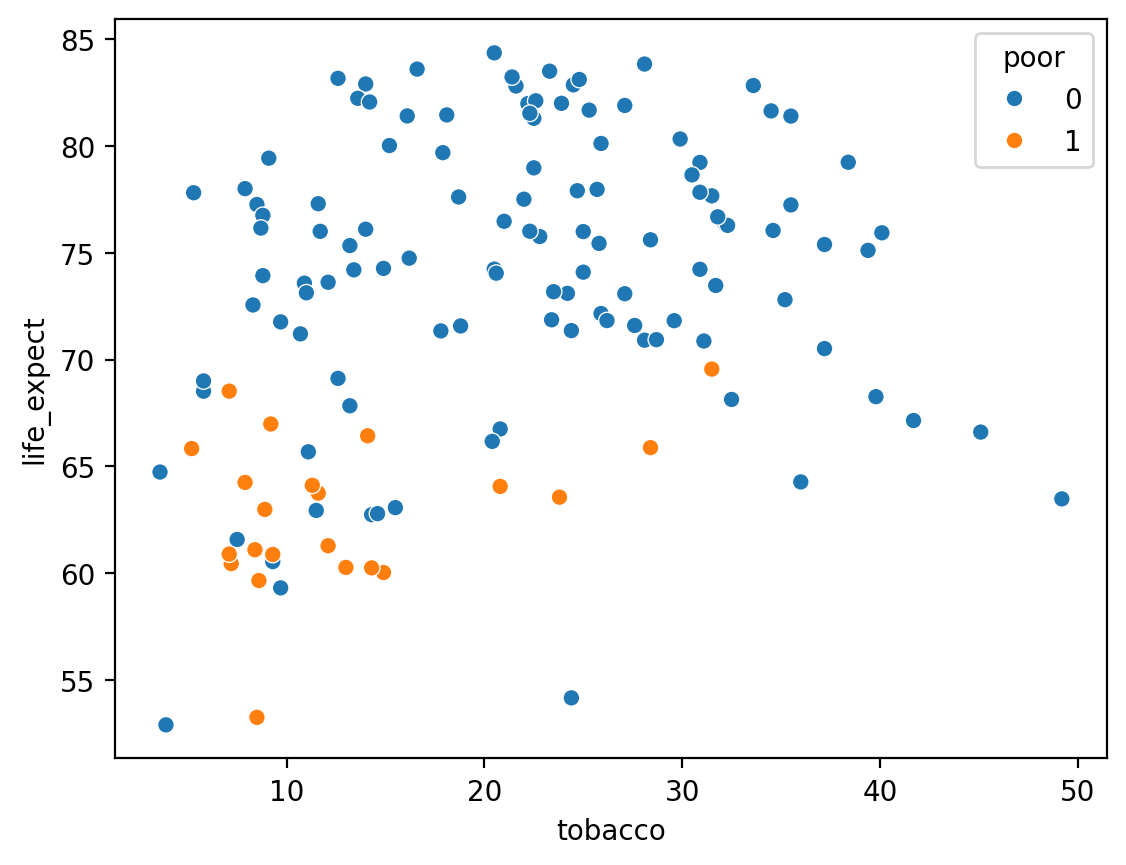

In [192]:
sns.scatterplot(data=df, x='tobacco', y='life_expect', hue='poor');

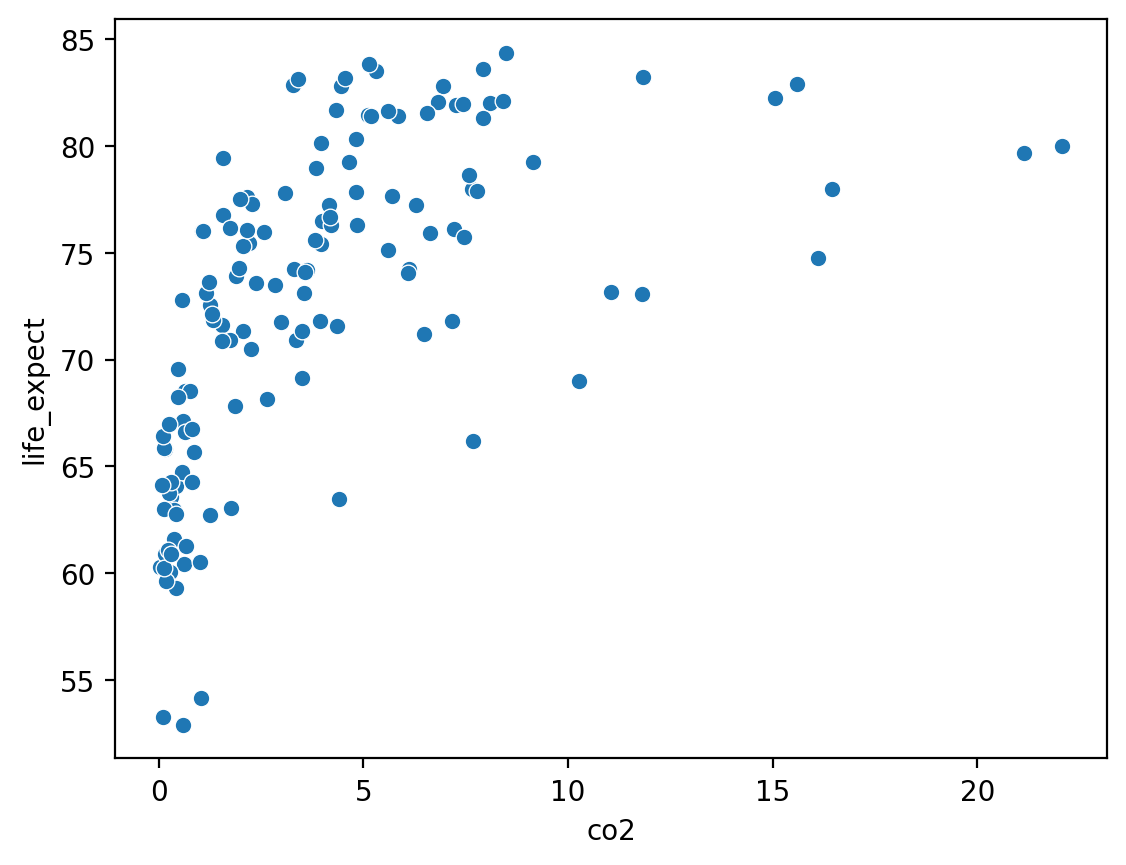

In [193]:
sns.scatterplot(data=df, x='co2', y='life_expect');

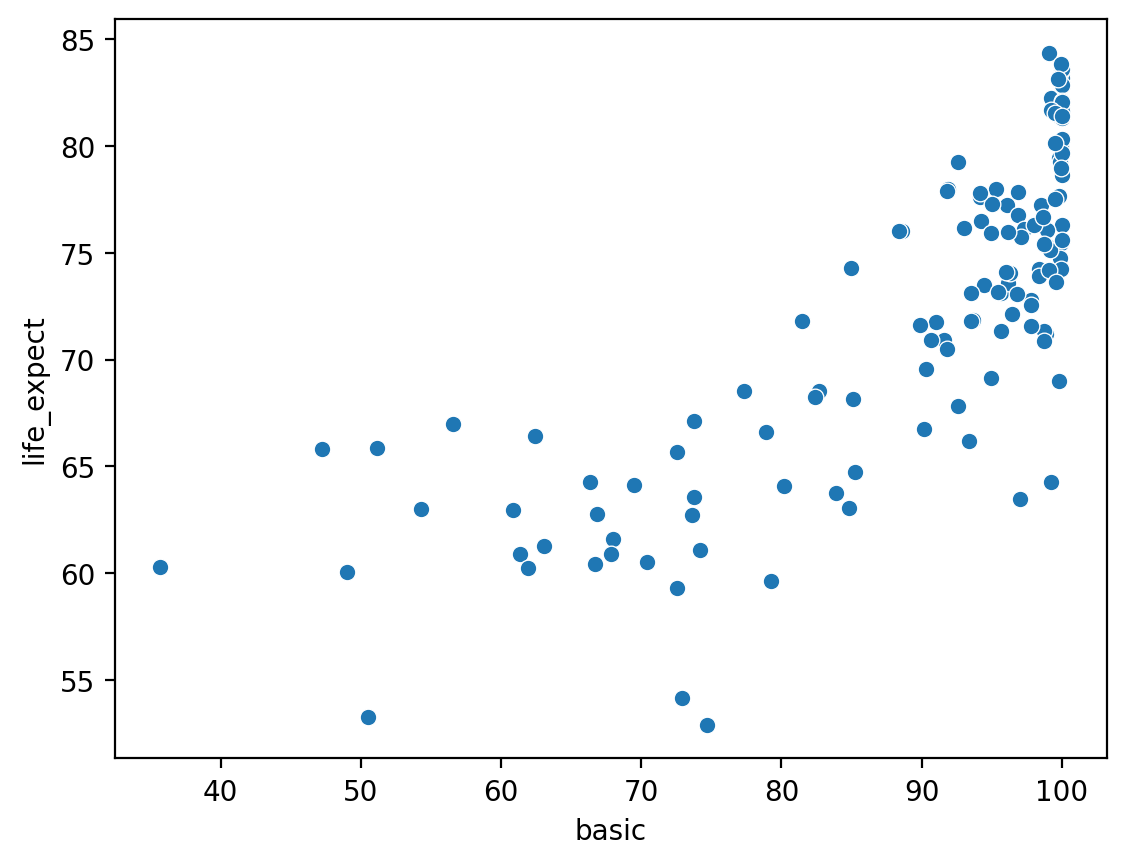

In [194]:
sns.scatterplot(data=df, x='basic', y='life_expect');

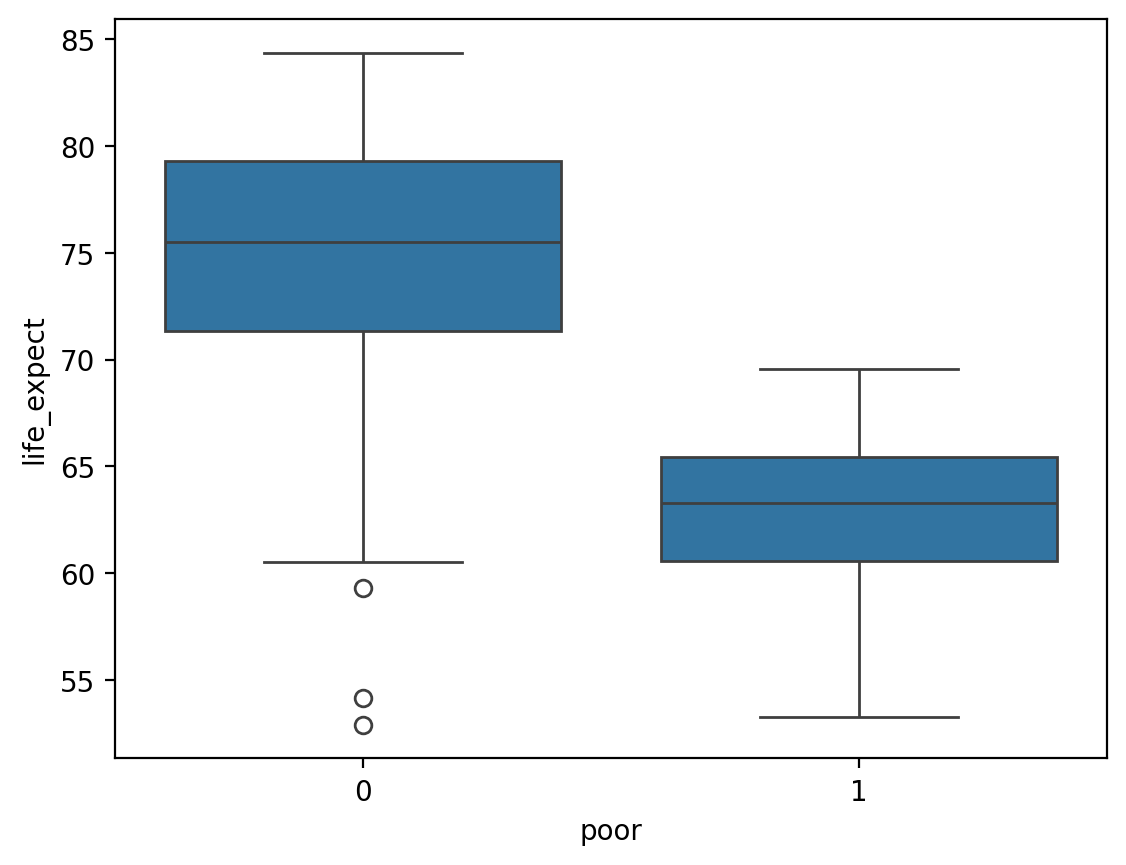

In [195]:
sns.boxplot(data=df, x='poor', y='life_expect');

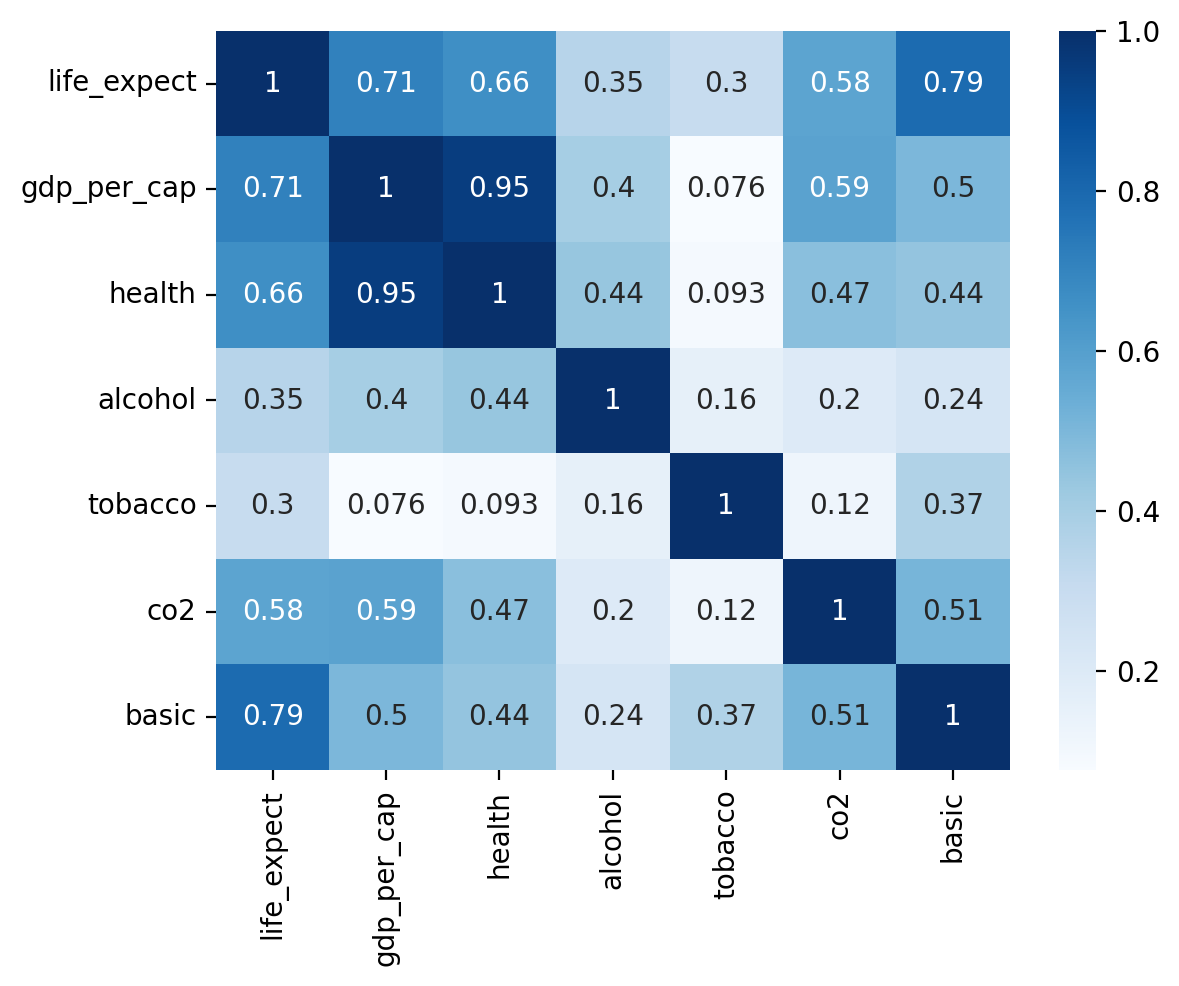

In [196]:
num = ['life_expect', 'gdp_per_cap', 'health', 'alcohol', 'tobacco', 'co2', 'basic']
corr = df[num].corr()
sns.heatmap(corr, cmap='Blues', annot=True);

In [197]:
m = smf.ols('life_expect ~ gdp_per_cap + health + alcohol + tobacco + co2 + basic + poor',
             data=df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     60.08
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.01e-37
Time:                        13:51:15   Log-Likelihood:                -373.78
No. Observations:                 138   AIC:                             763.6
Df Residuals:                     130   BIC:                             787.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.1747      3.353     12.876      

In [198]:
df['gdp_2'] = df.gdp_per_cap ** 2
df['health_2'] = df.health ** 2

In [199]:
m1 = smf.ols('life_expect ~ gdp_per_cap + gdp_2 + health + health_2 + alcohol + tobacco + co2 + basic + poor',
             data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     50.09
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           9.83e-38
Time:                        13:51:15   Log-Likelihood:                -369.26
No. Observations:                 138   AIC:                             758.5
Df Residuals:                     128   BIC:                             787.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.7423      3.387     13.506      

In [200]:
for i in ['life_expect', 'gdp_per_cap', 'health', 'tobacco', 'co2', 'basic']:
  df[f'l{i}'] = np.log(df[i])

df['lalcohol'] = np.log1p(df['alcohol'])

In [201]:
m2 = smf.ols('llife_expect ~ lgdp_per_cap + lhealth + lalcohol + ltobacco + lco2 + lbasic + poor',
             data=df).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:           llife_expect   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     62.11
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.97e-38
Time:                        13:51:15   Log-Likelihood:                 214.52
No. Observations:                 138   AIC:                            -413.0
Df Residuals:                     130   BIC:                            -389.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9911      0.222     13.495   

In [1]:
(np.exp(0.0359)-1)*100

3.6552186089381156